import libraries


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

%matplotlib inline

loading datasets

In [2]:
# Load the dataset with the appropriate encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1794,ham,How much i gave to you. Morning.,NaN,NaN,NaN
5222,ham,5 nights...We nt staying at port step liao...T...,NaN,NaN,NaN
4020,ham,We have to pick rayan macleran there.,NaN,NaN,NaN
1816,ham,Are you going to write ccna exam this week??,NaN,NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN


In [5]:
df.shape

(5572, 5)

DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Keep only the first two columns
df = df.iloc[:, :2] 

In [8]:
df.sample(5)

,v1,v2
134,spam,Want 2 get laid tonight? Want real Dogging loc...
1111,ham,"Awesome, think we can get an 8th at usf some t..."
3620,ham,That means from february to april i'll be gett...
5063,ham,I dunno lei... Like dun haf...
3861,ham,"Customer place, i wil cal u sir."


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2606,ham,R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
4977,ham,JADE ITS PAUL. Y DIDNåÕT U TXT ME? DO U REMEMB...
4636,ham,Oh ho. Is this the first time u use these type...
379,ham,I taught that Ranjith sir called me. So only i...
3571,ham,"Yup, leaving right now, be back soon"


In [10]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 target    0
text      0
dtype: int64


In [11]:

encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

VISUALIZATION OF DATA

In [ ]:
sns.countplot(df['target'])
plt.title("Label Distribution")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

SPLIT THE DATASETS

In [122]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


Text Vectorization using TF-IDF

In [123]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Train the Model

In [124]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [125]:
#Evaluate the Model
y_pred = model.predict(X_test_tfidf)

# Metrics

In [126]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.97


In [127]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.99


In [128]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.79


In [ ]:
# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1337
           1       0.99      0.79      0.88       214

    accuracy                           0.97      1551
   macro avg       0.98      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551



Visualize Performance

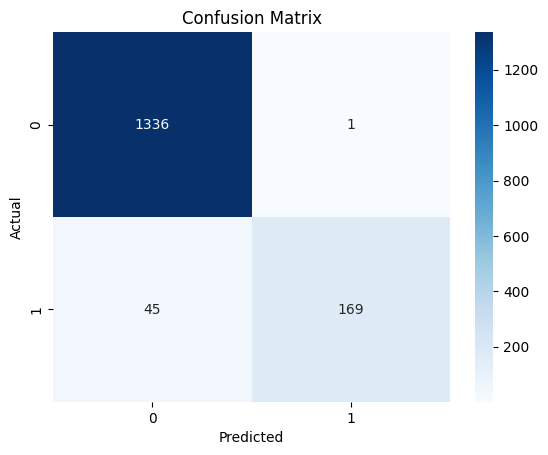

In [157]:
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Test with a Custom Message

In [158]:

sample_message = ["Congratulations! You've won a free ticket to Bahamas. Call now!"]
sample_tfidf = tfidf.transform(sample_message)
prediction = model.predict(sample_tfidf)
print("\nCustom Message Prediction: ", "Spam" if prediction[0] == 1 else "Ham")


Custom Message Prediction:  Ham
